# 4. Regression and Prediction

Perhaps the most common goal in statistics is to answer the question "Is the variable X (or more likely, X1,....Xp) associated with a variable Y, and if so, what is the relationship and can we use it to predict Y?

The process of training a model on data where the outcome is known _supervised learning_. Another important connection between data science and statistics is in the area of _anomaly detection_, where regression diagnostics originally intended for data analysis and improving the regression model can be used to detect unusual records.

#### Simple Linear Regression

Simple linear regression provides a model of the relationship between the magnitude of one variable and that of a second - for example, as X increases, Y also increases. or as X increases, Y decreases. Correlation is another way to measure how two variables are related. The difference is that while correlation measures the _strength_ of an association between two variables, regression quantifies the _nature_ of the relationship.

<table>
	<tr>
		<th>Term</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>Response</td>
		<td>The variable we are trying to predict (aka: dependent variable, Y variable, target, outcome)</td>
	</tr>
	<tr>
		<td>Independent variable</td>
		<td>The variable used to predict the response (aka: X variable, feature, attribute, predictor)</td>
	</tr>
	<tr>
		<td>Record</td>
		<td>The vector of predictor and outcome values for a specific individual or case</td>
	</tr>
	<tr>
		<td>Intercept</td>
		<td>The intercept of the regression line - that is, the predicted value when X=0</td>
	</tr>
	<tr>
		<td>Regression coefficient</td>
		<td>The slpe of the regression line</td>
	</tr>
	<tr>
		<td>Fitted values</td>
		<td>The estimates Yi, obtained from the regression line</td>
	</tr>
	<tr>
		<td>Residuals</td>
		<td>The difference between the observed values and the fitted values</td>
	</tr>
	<tr>
		<td>Least squares</td>
		<td>The method of fitting a regression by minimizing the sum of squared residuals</td>
	</tr>
</table>

#### The Regression Equation

Simple linear regression estimates how much Y will change when X changes by a certain amount. With correlation coefficient, the variables X and Y are interchangeable. With regression, we are trying to predict the Y variable from X using a linear relationship.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics

Consider the scatterplot below, displying the number of years a worker was exposed to cotton dust (Exposure) versus a measure of lung capacity (PEFR). How is PEFR related to Exposure? It's hard to tell based just on the picture.

In [2]:
df = pd.read_csv('https://github.com/gedeck/practical-statistics-for-data-scientists/raw/refs/heads/master/data/LungDisease.csv')

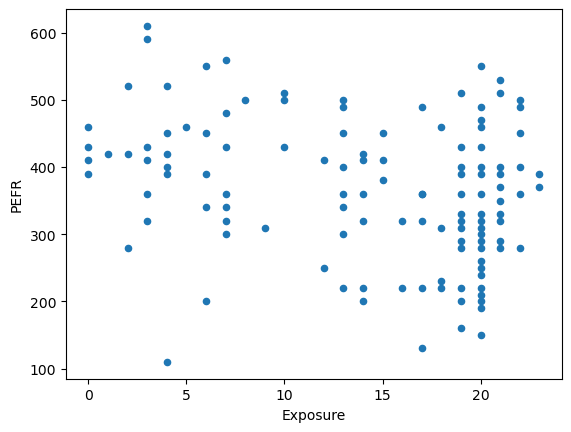

In [3]:
df.plot.scatter(x='Exposure', y='PEFR');

Simple linear regression tries to find the "best" line to predict the response PEFR as a function of the predictor variable Exposure.

In [4]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(df[predictors], df[outcome])

print(f'Intercept: {model.intercept_:3f}')
print(f'Coefficient Exposure: {model.coef_[0]:3f}')

Intercept: 424.582807
Coefficient Exposure: -4.184576


In [5]:
# With scikit-learn's LinearRegression model, we use the predict method on the training data to get
# the fitted values and subsequently the residuals. As we will see, this is a general pattern that
# all models in scikit-learn follow

fitted = model.predict(df[predictors])
residuals = df[outcome] - fitted

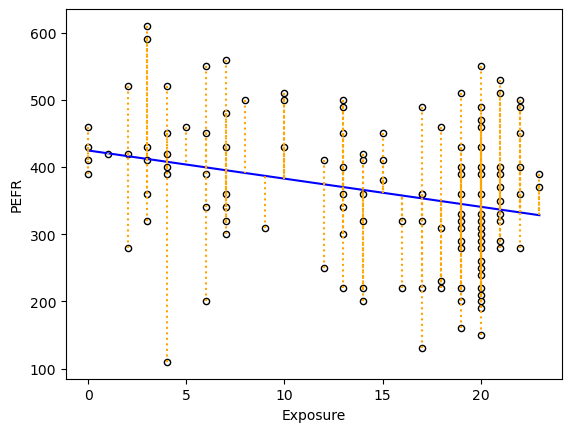

In [6]:
ax = df.plot.scatter(x='Exposure', y='PEFR', color='white', edgecolors='black')
ax.plot(df['Exposure'], fitted, color='blue')
ax.vlines(df['Exposure'], ymin=df['PEFR'], ymax=fitted, colors='orange', linestyles='dotted')
plt.show()

#### Multiple Linear Regression

When there are multiple predictors, the equation is simply extended to accomodate them. Instead of a line, we now have a linear model - the relationship between each coefficient and its variable (feature) is linear.

<table>
	<tr>
		<th>Term</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>Root mean squared error</td>
		<td>The square root of the average squared error of the regression (this is the most widely used metric o compare regression models) </td>
	</tr>
	<tr>
		<td>Residual standard error</td>
		<td>The same as the root mean squared error, but adjusted for degrees of freedom</td>
	</tr>
	<tr>
		<td>R-squared</td>
		<td>The proportion of variance explained by the model, from 0 to 1</td>
	</tr>
	<tr>
		<td>t-statistic</td>
		<td>The coefficient for a predictor, divided by the standard error of the coefficient, giving a metric to compare the importance of variables in the model</td>
	</tr>
	<tr>
		<td>Weighted regression</td>
		<td>Regression with the records having different weights</td>
	</tr>
</table>

All of the other concepts in simple linear regression, such as fitting by least squares and the definition of fitted values and residual, extend to the multiple linear regression setting.


In [ ]:
# An example of using multiple linear regression is in estimating the value of houses.
houses = pd.read_csv('https://github.com/gedeck/practical-statistics-for-data-scientists/raw/refs/heads/master/data/house_sales.csv', sep='\t')
houses.tail()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False
27063,2007-01-09,465000,9906000035,Single Family,2007-01-01,425600,0.977941,475489.0,1,4400,...,1.50,3,7,1928,0,0,311000,268000,98103,False


In [11]:
houses.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [12]:
# The goal is to predict the sales price from the other variables.
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

# Create and fit the linear model
houses_lm = LinearRegression()
houses_lm.fit(houses[predictors], houses[outcome])

LinearRegression()

In [14]:
# For a LinearRegression model, intercept and coefficients are the fields intercept_ and coef_ of
# the fitted model
print(f'Intercept: {houses_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, houses_lm.coef_):
	print(f'  {name}: {coef}')

Intercept: -521871.368
Coefficients:
  SqFtTotLiving: 228.83060360240768
  SqFtLot: -0.06046682065306966
  Bathrooms: -19442.84039832103
  Bedrooms: -47769.95518521435
  BldgGrade: 106106.96307898092


**Assessing the Model**

The most important performance metric from a data science perspective is _root mean squared error_, or RMSE. RMSE is the square root of the average squared error in the predicted yi values.

This measures the overall accuracy of the model and is a bsasis for comparing it to other models (including models fit using machine learning techniques). Similar to RMSE is the _residual standard error_, or RSE. The only difference is that the denominator is the degress of freedom, as opposed to number of records.

In [ ]:
# scikit-learn provides a number of metrics for regression and classification. Here, we
# use mean_squared_error to get RMSE and r2_score for the coefficient of determination
fitted = houses_lm.predict(houses[predictors])
RMSE = np.sqrt(metrics.mean_squared_error(houses[outcome], fitted))
r2 = metrics.r2_score(houses[outcome], fitted)

print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')


RMSE: 261220
r2: 0.5406


In [20]:
# Use statsmodels to get a more detailed analysis of the regression model in python
import statsmodels.api as sm

model = sm.OLS(houses[outcome], houses[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:16:22   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Another useful metric that you will see in software output is the _coefficient of determination_, also called the R-squared or R². R-squared ranges from 0 to 1 and measures the proportion of variation in the data that is accounted for in the model. It is useful mainly in explanatory uses of regression where you want to assess how well the model fits the data.